# Introdução

Este estudo se concentra na análise de uma base de dados de Recursos Humanos para compreender a alta rotatividade de funcionários em uma organização. Ao longo da análise, exploramos diferentes aspectos relacionados à permanência dos funcionários na empresa.

Primeiramente, examinamos o tempo médio de permanência dos colaboradores, oferecendo uma visão geral da estabilidade do quadro de funcionários ao longo do tempo. Em seguida, identificamos ciclos de rotatividade, destacando períodos específicos em que ocorreram picos de saída de funcionários.

Além disso, investigamos o perfil de risco dos funcionários, comparando funcionários desligados com os não desligados para entender se alta satisfação ou alto desempenho estavam diretamente relacionados a esses desligamentos.

Também realizamos análises estatísticas para identificar correlações entre as variáveis da base de dados, buscando compreender melhor os fatores subjacentes à alta rotatividade.

Por fim, comparamos os funcionários com até 2 anos de empresa e aqueles com mais de 2 anos, buscamos identificar possíveis discrepâncias que possam fornecer insights adicionais sobre a retenção de talentos.

Participantes:
- Lucas D Pontes: <https://www.linkedin.com/in/lucasdpontes/>
- Pedro Borges: <https://www.linkedin.com/in/pedrogborges/>

# Análise exploratória

Importação das bibliotecas e dataset

In [ ]:
# Importação das bibliotecas
from google.colab import drive
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Criação do dataframe via Google Drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Desafio Data Viking/Base_dados - Rotatividade RH.xlsx')

# Comando para não inibir colunas nos métodos de dataframe
pd.set_option('display.max_columns', None)

Mounted at /content/drive


Exploração do dataset

In [ ]:
# Informações gerais
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [ ]:
# Informações gerais - colunas numéricas
df.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,650,144,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,2022-10-31 06:38:46.153846272,2024-05-14 00:00:00,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
min,2021-06-29 00:00:00,2024-05-14 00:00:00,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,2022-02-24 00:00:00,2024-05-14 00:00:00,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,2022-10-22 00:00:00,2024-05-14 00:00:00,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,2023-07-19 00:00:00,2024-05-14 00:00:00,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,2024-02-14 00:00:00,2024-05-14 00:00:00,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000
std,NaN,NaN,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602


💡 Com base na tabela acima, em comparação à média e desvio padrão, não foram identificados outliers. Há maneiras mais criteriosas de identificá-los, como as visualizações *boxplot*, *scatterplot* etc, a depender do tipos e quantidades de variáveis.

In [ ]:
# Análise de duplicatas
df.duplicated().sum()

0

💡 Apesar de não haver duplicatas, se fosse o caso, poderia-se excluí-las através do código:

`df = df.drop_duplicates(subset=['coluna_como_critério'],keep='critério')`

In [ ]:
# Coluna de string 'Nivel_Cargo'
count = df.Nivel_Cargo.value_counts()
perc = df.Nivel_Cargo.value_counts(normalize=True)
pd.concat([count,perc], axis=1, keys=['Valor', 'Percentagem'])

,Valor,Percentagem
Nivel_Cargo,,
Junior,233,0.358462
Pleno,225,0.346154
Sênior,192,0.295385


## Conclusões iniciais:


*   não foi identificada necessidade de converter colunas
*   os cenários de desligamento na coluna `Data_Desligamento` são representados por valores nulos `NaT`, podendo não funcionar em algumas bibliotecas sem um tratamento específico. Caso necessário, pode-se utilizar o método `df['Data_Desligamento'].fillna("valor_a_ser_substituído", inplace = True)`.



# Estudos e Análises

🟢 **Tempo médio de permanência:** em um olhar geral, qual a permanência de um funcionário?

In [ ]:
# Seleção de linhas não nulas de 'Data_Desligamento'
df_desligados = df.loc[~df['Data_Desligamento'].isnull()]

# Criação da variável
tempo_medio_permanencia = round(df_desligados['Meses_de_Servico'].mean(),2)
tempo_medio_permanencia

17.52

🟢 **Ciclos de rotatividades:** períodos de maior rotatividade

In [ ]:
df_desligados.Data_Desligamento.value_counts()

Data_Desligamento
2024-05-14    144
Name: count, dtype: int64

💡 Aparentemente, a coluna `Data_Desligamento` indica todos os colaboradores foram desligados no mesmo mês, podendo ser um cenário de *layoff*. Portanto, os ciclos de rotatividade serão analisados com base na data de contratação.

In [ ]:
# Criação das variáveis para construção do gráfico
datas_contratacao = df_desligados['Data_Contratacao'].value_counts().reset_index()
datas_contratacao.columns = ['Data_Contratacao', 'Contagem']

# Ordenação temporal do dataset
datas_contratacao = datas_contratacao.sort_values(by=['Data_Contratacao'], ascending=True)

# Plotagem
fig = px.line(datas_contratacao, x='Data_Contratacao', y='Contagem', markers = True, title='Histórico de contratações',
              labels={'Data_Contratacao': 'Data de contratação', 'Contagem': 'Quantidade'}, text='Contagem',
              width=800, height=450)
fig.update_traces(textposition='top center')
fig.show()

🟢 **Perfil de risco:** funcionários Plenos e Sêniores com alto desempenho e alta satisfação no trabalho apresentam maior tempo de permanência, outros

In [ ]:
# Estatísticas descritivas para satisfação no trabalho e desempenho dos funcionários desligados
df_desligados[['Satisfacao_Trabalho','Pontuacao_Desempenho']].describe()

,Satisfacao_Trabalho,Pontuacao_Desempenho
count,144.000000,144.000000
mean,2.885305,3.317407
std,1.142496,1.193951
min,1.002868,1.004830
25%,1.902800,2.402963
50%,2.822590,3.437308
75%,3.859398,4.485610
max,4.949533,4.992102


In [ ]:
# Média de desempenho e satisfação

pivot = pd.pivot_table(df[['Pontuacao_Desempenho','Satisfacao_Trabalho','Desligamento']],
                       values=['Pontuacao_Desempenho','Satisfacao_Trabalho'],
                       index=None, columns=['Desligamento'], aggfunc='mean',
                       dropna=True, margins_name='All')

pivot = pivot.rename(index={'Pontuacao_Desempenho': 'Desempenho médio', 'Satisfacao_Trabalho': 'Satisfação média'},
                     columns={0: 'Desligado', 1: 'Ativo'})
pivot_desempenho_satisfacao = pivot.round(2)

pivot_desempenho_satisfacao

Desligamento,Desligado,Ativo
Desempenho médio,2.94,3.32
Satisfação média,2.96,2.89


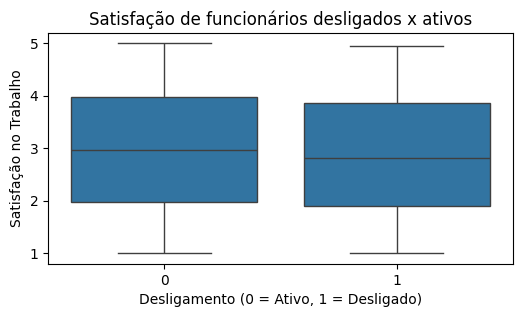

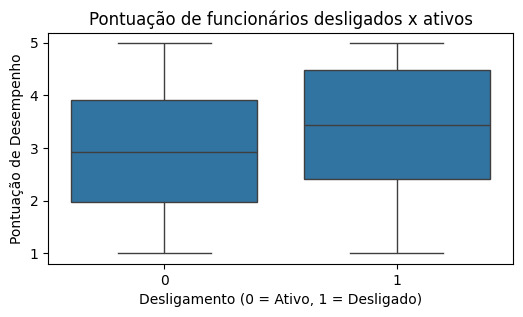

In [ ]:
# Satisfação no trabalho entre funcionários desligados e ativos
plt.figure(figsize=(6, 3))
sns.boxplot(x='Desligamento', y='Satisfacao_Trabalho', data=df)
plt.title('Satisfação de funcionários desligados x ativos')
plt.xlabel('Desligamento (0 = Ativo, 1 = Desligado)')
plt.ylabel('Satisfação no Trabalho')
plt.show()

# Desempenho entre funcionários desligados e ativos
plt.figure(figsize=(6, 3))
sns.boxplot(x='Desligamento', y='Pontuacao_Desempenho', data=df)
plt.title('Pontuação de funcionários desligados x ativos')
plt.xlabel('Desligamento (0 = Ativo, 1 = Desligado)')
plt.ylabel('Pontuação de Desempenho')
plt.show()

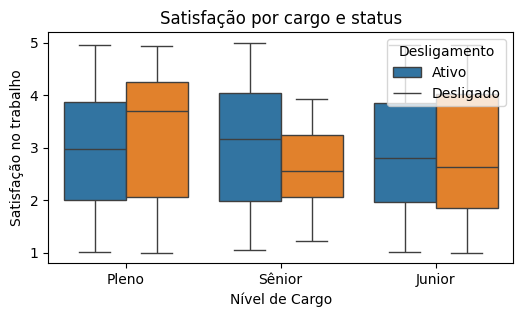

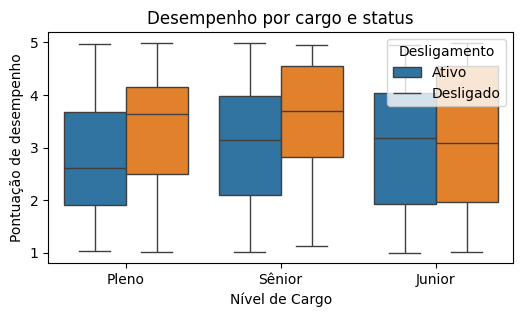

In [ ]:
# Satisfação no trabalho entre funcionários desligados e ativos x cargo
plt.figure(figsize=(6, 3))
sns.boxplot(x='Nivel_Cargo', y='Satisfacao_Trabalho', hue='Desligamento', data=df)
plt.title('Satisfação por cargo e status')
plt.xlabel('Nível de Cargo')
plt.ylabel('Satisfação no trabalho')
plt.legend(title='Desligamento', loc='upper right', labels=['Ativo', 'Desligado'])
plt.show()

# Desempenho entre funcionários desligados e ativos x cargo
plt.figure(figsize=(6, 3))
sns.boxplot(x='Nivel_Cargo', y='Pontuacao_Desempenho', hue='Desligamento', data=df)
plt.title('Desempenho por cargo e status')
plt.xlabel('Nível de Cargo')
plt.ylabel('Pontuação de desempenho')
plt.legend(title='Desligamento', loc='upper right', labels=['Ativo', 'Desligado'])
plt.show()

🟢 **Correlações:** existem relações entre as variáveis?

<Axes: >

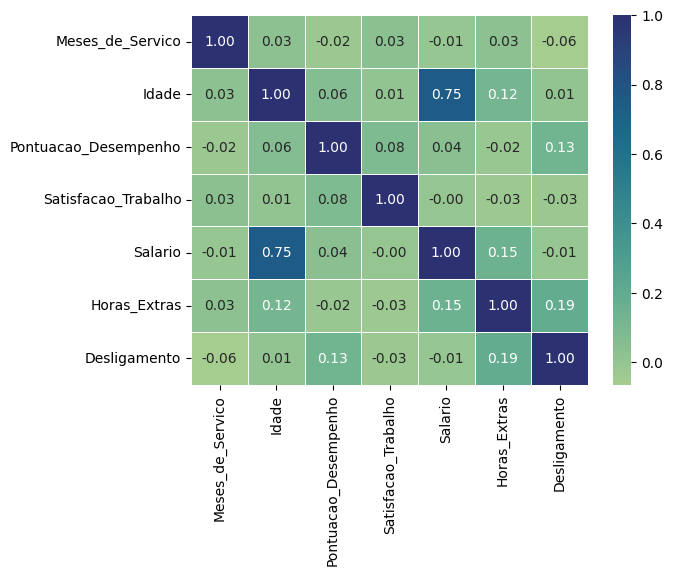

In [ ]:
# Aplicação de mapa de calor para análise das correlações

sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidth=.5, fmt=".2f", cmap="crest")

💡 Há alta correlação entre a idade e salário dos colaboradores.

🟢 **Funcionários com 2 anos:** o que há diferente entre eles?


In [ ]:
# Flag para funcionários com mais de 02 anos
df['Mais_de_2_anos'] = 0
df.loc[df['Meses_de_Servico'] > 24, 'Mais_de_2_anos'] = 1

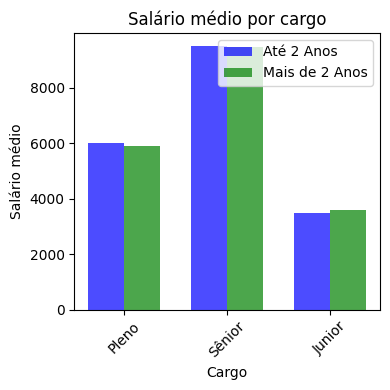

In [ ]:
nivel_cargo_salario_ate_2_anos = df[df['Mais_de_2_anos'] == 0].groupby('Nivel_Cargo')['Salario'].mean()
nivel_cargo_salario_mais_de_2_anos = df[df['Mais_de_2_anos'] == 1].groupby('Nivel_Cargo')['Salario'].mean()

# Para garantir que os dataframes possuam os mesmos níveis de cargo, caso esteja ausente em algum dos grupos
nivel_cargos = set(nivel_cargo_salario_ate_2_anos.index).union(set(nivel_cargo_salario_mais_de_2_anos.index))
nivel_cargo_salario_ate_2_anos = nivel_cargo_salario_ate_2_anos.reindex(nivel_cargos, fill_value=0)
nivel_cargo_salario_mais_de_2_anos = nivel_cargo_salario_mais_de_2_anos.reindex(nivel_cargos, fill_value=0)

# Plotagem
labels = nivel_cargos
medias_ate_2_anos = nivel_cargo_salario_ate_2_anos.values
medias_mais_de_2_anos = nivel_cargo_salario_mais_de_2_anos.values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(4, 4))
rects1 = ax.bar(x - width/2, medias_ate_2_anos, width, label='Até 2 Anos', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, medias_mais_de_2_anos, width, label='Mais de 2 Anos', color='green', alpha=0.7)

ax.set_xlabel('Cargo')
ax.set_ylabel('Salário médio')
ax.set_title('Salário médio por cargo')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Dataframe com médias de satisfação, desempenho e horas extras x status

df_2_anos = pd.DataFrame(columns=['Media_desempenho','Media_satisfacao','Media_horas_extras', 'Mais_de_2_anos'])

df_2_anos.loc[0] = [df[df['Mais_de_2_anos'] == 0]['Pontuacao_Desempenho'].mean(),
                    df[df['Mais_de_2_anos'] == 0]['Satisfacao_Trabalho'].mean(),
                    df[df['Mais_de_2_anos'] == 0]['Horas_Extras'].mean(),
                    0]
df_2_anos.loc[1] = [df[df['Mais_de_2_anos'] == 1]['Pontuacao_Desempenho'].mean(),
                    df[df['Mais_de_2_anos'] == 1]['Satisfacao_Trabalho'].mean(),
                    df[df['Mais_de_2_anos'] == 1]['Horas_Extras'].mean(),
                    1]

<Axes: xlabel='Mais_de_2_anos', ylabel='Media_horas_extras'>

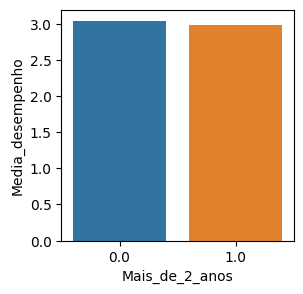

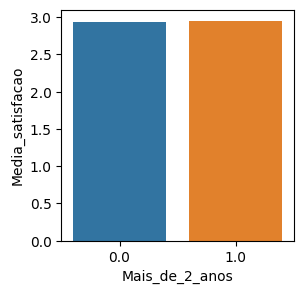

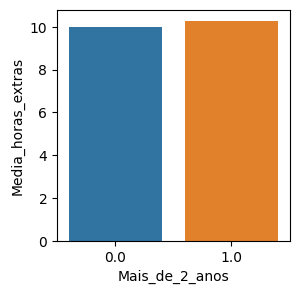

In [ ]:
# Plotagem

plt.figure(figsize=(3, 3))
sns.barplot(df_2_anos, x='Mais_de_2_anos', y='Media_desempenho', hue='Mais_de_2_anos', legend=False)

plt.figure(figsize=(3, 3))
sns.barplot(df_2_anos, x='Mais_de_2_anos', y='Media_satisfacao', hue='Mais_de_2_anos', legend=False)

plt.figure(figsize=(3, 3))
sns.barplot(df_2_anos, x='Mais_de_2_anos', y='Media_horas_extras', hue='Mais_de_2_anos', legend=False)

## Conclusões iniciais
O **tempo médio de permaência** foi de 17,5 meses.

Com base no histórico de contratações, houve uma alta desse valor no 4º trimestre de 2023.

No segundo trimestre desse ano, especificamente em 14/05/2024, houveram 144 desligamentos, **indicando um possível cenário de Layoff**.

Foi identificada alta correlação entre a idade e salário dos funcionários.

# Conclusões

Após analisar o perfil dos funcionários desligados e não desligados, observamos que todos os funcionários foram desligados no mesmo dia, o que sugere uma ação coletiva ou uma decisão organizacional em massa. Além disso, constatamos que a satisfação média dos funcionários desligados era significativamente menor do que a dos funcionários não desligados, indicando uma possível relação entre insatisfação e saída da empresa.

Surpreendentemente, descobrimos que o desempenho dos funcionários desligados era, em média, maior do que o dos funcionários não desligados. Isso pode sugerir que outros fatores, além do desempenho no trabalho, estão contribuindo para a rotatividade de pessoal, como questões de cultura organizacional, falta de oportunidades de crescimento ou desalinhamento de expectativas.

Essas descobertas ressaltam a importância de uma abordagem multidisciplinar para a retenção de talentos, que leve em consideração não apenas o desempenho individual, mas também o engajamento, a satisfação e o bem-estar dos funcionários. Ao abordar esses aspectos, as organizações podem criar um ambiente de trabalho mais positivo e motivador, reduzindo assim a rotatividade de funcionários e promovendo a retenção de talentos de forma eficaz.